In [154]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [156]:
df=pd.read_csv("IMDbMoviesIndia.csv", encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [157]:
df.shape

(15509, 10)

#DATA CLEANING

In [158]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [160]:
df.duplicated().sum()

6

In [161]:
df.dropna(inplace=True)

In [162]:
df.shape

(5659, 10)

In [163]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [164]:
df.drop_duplicates(inplace=True)

In [165]:
df.shape

(5659, 10)

In [166]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

#DATA PRE-PROCESSING

In [167]:
df['Year']=df['Year'].str.replace(r'[()]','',regex=True).astype(float)

In [168]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [169]:
df['genre']=df['Genre'].str.split(',')
df=df.explode('genre')
df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)

In [170]:

df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))
     

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 1 to 15508
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  float64
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
 10  genre     11979 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


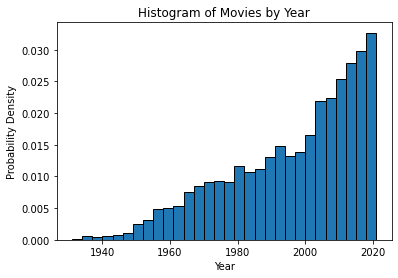

In [173]:
import matplotlib.pyplot as plt

# Sample IMDb data
years = df['Year']  # Assuming 'Year' column exists in the dataframe

# Create histogram using Matplotlib
plt.hist(years, bins=30, density=True, edgecolor='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.title('Histogram of Movies by Year')

# Show the plot
plt.show()


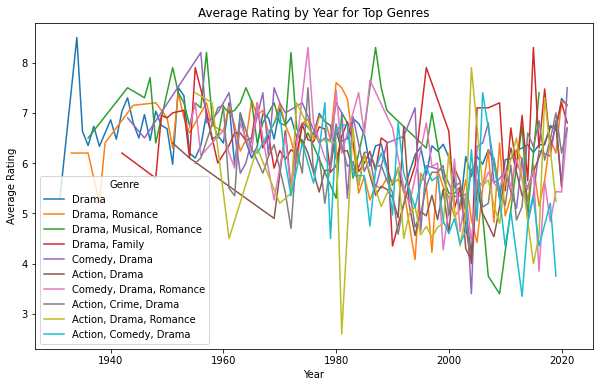

In [175]:
# Group data by Year and calculate the average rating
avg_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 10 genres
top_genres = df['Genre'].value_counts().head(10).index

# Filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

# Set the plot size
plt.figure(figsize=(10,6))

# Plot using Seaborn for each genre
sns.lineplot(data=average_rating_by_year, x='Year', y='Rating', hue='Genre')

# Add titles and labels
plt.title('Average Rating by Year for Top Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Show the plot
plt.show()


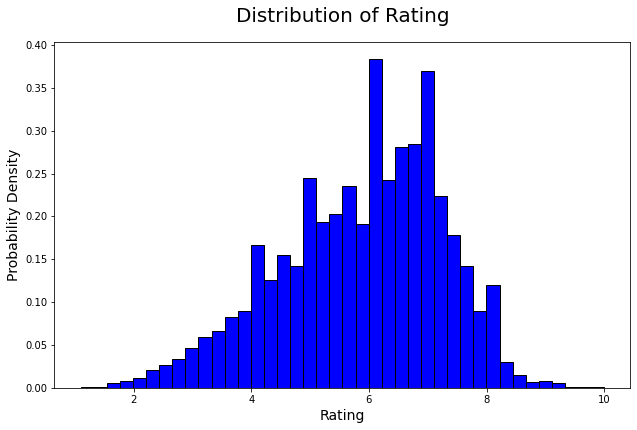

In [176]:
import matplotlib.pyplot as plt

# Sample IMDb data
ratings = df['Rating']  # Assuming 'Rating' column exists in the dataframe

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram using Matplotlib
plt.hist(ratings, bins=40, density=True, edgecolor='black', color='blue')

# Add title and axis labels
plt.title('Distribution of Rating', fontsize=20, pad=20)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)

# Customize the plot background and grid
plt.grid(False)  # Hide the grid
plt.gca().set_facecolor('white')  # Set plot background color to white

# Adjust bar gaps by using edge color and spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()


In [177]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
     

In [178]:
df.drop('Name', axis = 1, inplace = True)

#FEATURE ENGINEERING

In [179]:
# Grouping the columns with their average rating and then creating a new feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating =df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating
     

In [180]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']
     

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


#MODEL BULIDING

In [182]:
# Building machine learning model and training them
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [183]:
# Evaluating the performance of model with evaluation metrics

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4400308707628384
Mean absolute error:  0.48860942189611917
R2 score:  0.7675540095845457


#MODEL TESTING

In [184]:

X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019.0,8,109,6.415521,7.000000,6.850000,7.00,7.00
3,2019.0,35,110,5.716822,4.400000,5.250000,4.40,4.46
3,2019.0,35,110,5.716822,4.400000,5.250000,4.40,4.46
5,1997.0,827,147,6.242222,5.335135,4.793617,5.73,5.93
5,1997.0,827,147,6.242222,5.335135,4.793617,5.73,5.93


In [186]:

y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [187]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate.

data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
trail = pd.DataFrame(data)
     

# Predict the movie rating by entered data
rating_predicted = Model.predict(trail)

# Display the predicted result from the Model
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 4.241590470741204
